In [1]:
import numpy as np
import json
from datetime import datetime, timezone
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import sys
np.set_printoptions(suppress=True)

In [2]:
filename = 'top100d.json'
with open(filename, 'r') as f:
    cities = json.loads(f.read())
for k, v in cities.items():
    print(v['name'], end=', ')

X, Y, C, S = 0, 0, 0, 0
for i, (k, v) in enumerate(cities.items()):
    print(f"{k}: {v['name']}".ljust(25), end='')
    q0 = v['data'][0][1]
    q1 = v['data'][1][1]
    q2 = v['data'][2][1]
    q3 = v['data'][3][1]

    x = float(np.sum(q0)) / 25
    y = float(np.mean(q2))
    c = float(np.mean(q2) - np.mean(q3))
    s = float(np.sum(q0) - np.sum(q1)) / 25
    v['xycs'] = (x,y,c,s,)
    X += x
    Y += y
    C += c
    S += s
    if i%6-5==0:
        print()
print()
print(X, Y, C, S)
for v in cities.values():
    v['normalised'] = (v['xycs'][0]/X, v['xycs'][1]/Y, v['xycs'][2]/C, v['xycs'][3]/S,)

filename = 'top100n.json'
with open(filename, 'w') as f:
    f.write(json.dumps(cities, indent=4))

Shanghai, Beijing, Shenzhen, Guangzhou, Kinshasa, Lagos, Istanbul, Chengdu, Mumbai, São Paulo, Mexico City, Karachi, Tianjin, Delhi, Wuhan, Moscow, Dhaka, Seoul, Dongguan, Cairo, Xi’an, Nanjing, Hangzhou, Foshan, Ho Chi Minh City, London, New York City, Jakarta, Bengaluru, Tokyo, Hanoi, Taipei, Lima, Bogotá, Hong Kong, Chongqing, Baghdad, Qingdao, Tehran, Shenyang, Hyderābād, Rio de Janeiro, Suzhou, Ahmedabad, Abidjan, Lahore, Singapore, Johannesburg, Dar es Salaam, Saint Petersburg, Alexandria, Harbin, Sydney, Bangkok, Hefei, Melbourne, Dalian, Kano, Santiago, Changchun, Cape Town, Jeddah, Chennai, Kolkata, Xiamen, Surat, Yangon, Kabul, Nairobi, Wuxi, Giza, Jinan, Taiyuan, Zhengzhou, Bamako, Riyadh, Shijiazhuang, Chattogram, Los Angeles, Addis Ababa, Kunming, Zhongshan, Nanning, Shantou, Yokohama, Fuzhou, Ningbo, Busan, Casablanca, Ibadan, Puyang, Ankara, Dubai, Shiyan, Berlin, Tangshan, Changzhou, Madrid, Pyongyang, Zibo, 25305: Shanghai          98420: Beijing           50628: Shenz

In [3]:
filename = 'top100n.json'
with open(filename, 'r') as f:
    cities = json.loads(f.read())
for k, v in cities.items():
    print(v['name'], end=', ')

for k, v in cities.items():
    almanac = {j: np.linalg.norm(np.array(v['normalised']) - np.array(w['normalised'])) for j, w in cities.items()}
    almanac = {ak: av for ak, av in sorted(almanac.items(), key=lambda x: x[1], reverse=False)}
    v['similar'] = [int(key) for key in almanac.keys()]

filename = 'top100ss.json'
with open(filename, 'w') as f:
    f.write(json.dumps(cities, indent=4))

Shanghai, Beijing, Shenzhen, Guangzhou, Kinshasa, Lagos, Istanbul, Chengdu, Mumbai, São Paulo, Mexico City, Karachi, Tianjin, Delhi, Wuhan, Moscow, Dhaka, Seoul, Dongguan, Cairo, Xi’an, Nanjing, Hangzhou, Foshan, Ho Chi Minh City, London, New York City, Jakarta, Bengaluru, Tokyo, Hanoi, Taipei, Lima, Bogotá, Hong Kong, Chongqing, Baghdad, Qingdao, Tehran, Shenyang, Hyderābād, Rio de Janeiro, Suzhou, Ahmedabad, Abidjan, Lahore, Singapore, Johannesburg, Dar es Salaam, Saint Petersburg, Alexandria, Harbin, Sydney, Bangkok, Hefei, Melbourne, Dalian, Kano, Santiago, Changchun, Cape Town, Jeddah, Chennai, Kolkata, Xiamen, Surat, Yangon, Kabul, Nairobi, Wuxi, Giza, Jinan, Taiyuan, Zhengzhou, Bamako, Riyadh, Shijiazhuang, Chattogram, Los Angeles, Addis Ababa, Kunming, Zhongshan, Nanning, Shantou, Yokohama, Fuzhou, Ningbo, Busan, Casablanca, Ibadan, Puyang, Ankara, Dubai, Shiyan, Berlin, Tangshan, Changzhou, Madrid, Pyongyang, Zibo, 

-254.51696095611783 336.6428166473543


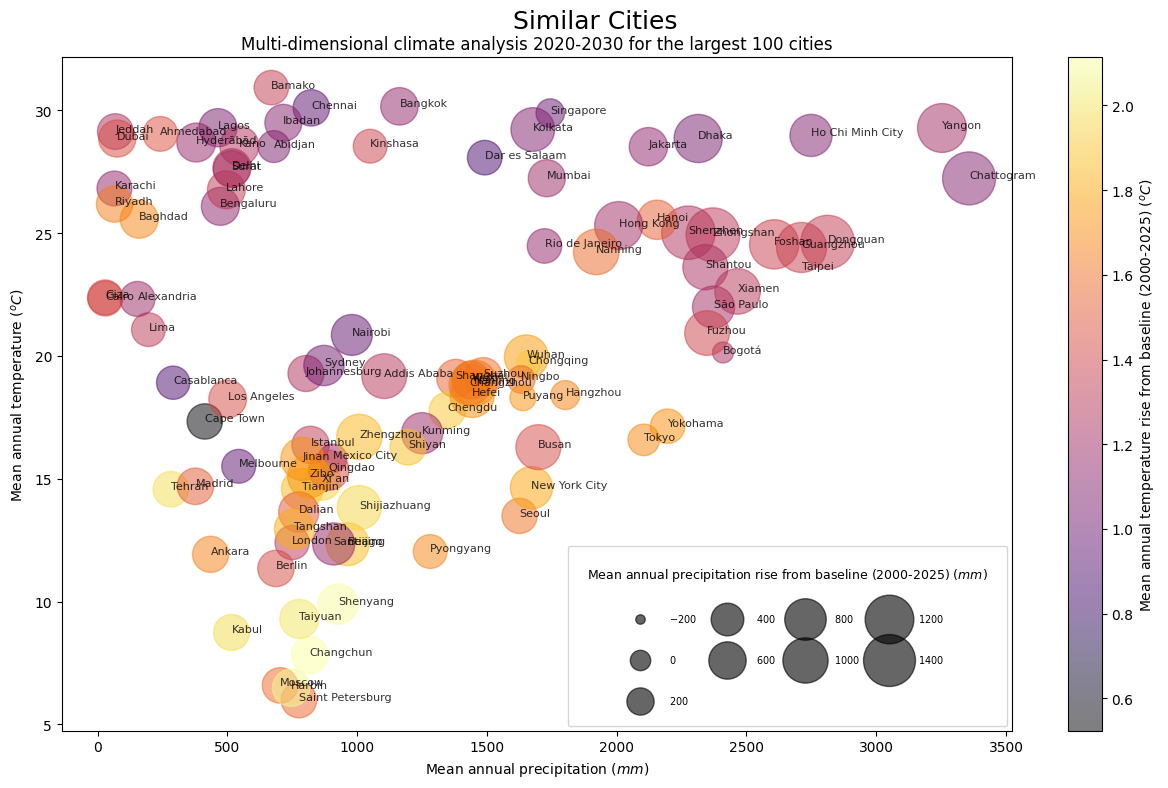

In [4]:
filename = 'top100ss.json'
with open(filename, 'r') as f:
    cities = json.loads(f.read())

fig, ax = plt.subplots(1, 1, figsize=(12,8))

# x, y, s, c
ind = [0,1,2,3]

titles = ['Mean annual precipitation $(mm)$',
          'Mean annual temperature $(^oC)$',
          'Mean annual temperature rise from baseline (2000-2025) $(^oC)$',
          'Mean annual precipitation rise from baseline (2000-2025) $(mm)$']

datasize = len(cities.keys())
x = np.zeros((datasize))
y = np.zeros((datasize))
size = np.zeros((datasize))
color = np.empty((datasize), dtype=object)
names = np.empty((datasize), dtype=object)

for i, (k, v) in enumerate(cities.items()):
    x[i] = v['xycs'][ind[0]]
    y[i] = v['xycs'][ind[1]]
    color[i] = v['xycs'][ind[2]]
    size[i] = v['xycs'][ind[3]]
    names[i] = v['name']

minsize, maxsize = np.min(size), np.max(size)
print(minsize, maxsize)
size = 1500*(size-minsize) / (maxsize-minsize)
inv_size = lambda x : x*(maxsize-minsize) / 500 + minsize

sc = ax.scatter(x, y, linewidth=1, c=color, s=size, cmap=cm.inferno, alpha=0.5)
for i in range(datasize):
    ax.text(x[i], y[i], names[i], fontsize=8, alpha=0.8)

ax.set_xlabel(titles[ind[0]])
ax.set_ylabel(titles[ind[1]])

cbar = fig.colorbar(sc, fraction=0.1)
cbar.set_label(titles[ind[2]])

handles, labels = sc.legend_elements(prop="sizes", alpha=0.6, func=inv_size )
ax.legend(handles, labels, title=titles[ind[3]], loc='lower right', ncol=4, fancybox=True,  borderpad=2, labelspacing=3, title_fontsize=9, fontsize=7, handletextpad=2)

ax.set_title('Multi-dimensional climate analysis 2020-2030 for the largest 100 cities')
fig.tight_layout()
fig.subplots_adjust(top=0.92)
fig.suptitle('Similar Cities', fontsize=18)
plt.show()

Enter city: London


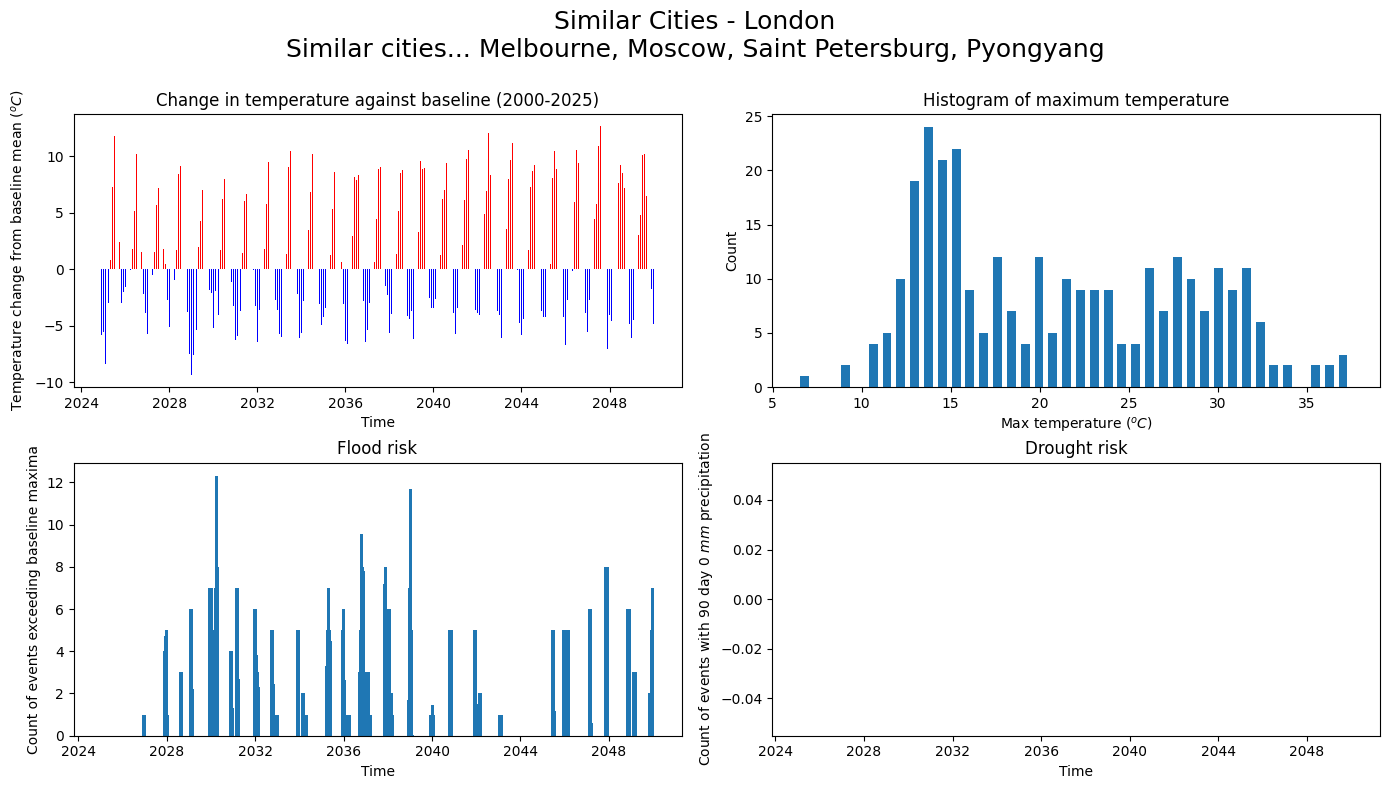

In [5]:
answer = input('Enter city:')
keys = [k for k, v in cities.items() if v['name'].lower().startswith(answer.lower())]
if len(keys) > 0:
    key = keys[0]
    queries = cities[key]['data']
    fig, axs = plt.subplots(2, 2, figsize=(14,8))
    ax = axs[0,0]
    ax.set_title('Change in temperature against baseline (2000-2025)')
    basetmp = np.mean(queries[3][1])
    x = [datetime.fromisoformat(d.replace('Z', '+00:00')) for d in queries[2][0][0]]
    y = np.array(queries[2][1]).reshape(-1) - basetmp
    color = np.where(y>0, 'r', 'b')
    ax.bar(x,y, width=10, color=color)
    ax.set_xlabel('Time')
    ax.set_ylabel('Temperature change from baseline mean $(^oC)$')

    ax = axs[0,1]
    ax.set_title('Histogram of maximum temperature')
    ax.hist(np.array(queries[6][1]).reshape(-1), bins=40, width=0.5)
    ax.set_xlabel('Max temperature $(^oC)$')
    ax.set_ylabel('Count')

    ax = axs[1,0]
    ax.set_title('Flood risk')
    x = [datetime.fromisoformat(d.replace('Z', '+00:00')) for d in queries[9][0][0]]
    y = np.array(queries[9][1]).reshape(-1)
    ax.bar(x,y, width=50)
    ax.set_xlabel('Time')
    ax.set_ylabel('Count of events exceeding baseline maxima')

    ax = axs[1,1]
    ax.set_title('Drought risk')
    x = [datetime.fromisoformat(d.replace('Z', '+00:00')) for d in queries[10][0][0]]
    y = np.array(queries[10][1]).reshape(-1)
    ax.bar(x,y, width=50)
    ax.set_xlabel('Time')
    ax.set_ylabel('Count of events with 90 day 0 $mm$ precipitation')

    fig.tight_layout()
    fig.subplots_adjust(top=0.85)
    fig.suptitle(f"Similar Cities - {cities[key]['name']}\n" + f"Similar cities... {', '.join([cities[str(k)]['name'] for k in cities[key]['similar'][1:5]])}", fontsize=18)
    plt.show()
else:
    print(f'{answer} not found')